### All necessary libraries  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import math

- My project is that time series analysis of crude price change over period of time and predictions about the future using the past data.
- I am using the Long Short-Term Memory (LSTM) models by using this models I can using LSTM deep learning of long periods data and making them ideal.
- In this project I do 3 section Getting the data from the source Filtering the data and plotting them Prediction 

## Scraping Data
- I use the website for collecting data `‘https://www.eia.gov/’` .
- I scrape the data from this website but using API key for getting the key I going on the EIA Data Sets > Petroleum > Prices > Spot Prices
- And the link of API is `http://api.eia.gov/series/?api_key=YOUR_API_KEY_HERE&series_id=PET.RBRTE.D`


In [3]:
#Getting data of crude price
df = pd.read_html('https://www.eia.gov/opendata/v1/qb.php?category=241335&sdid=PET.RBRTE.D')

In [4]:
df

[                             Series Name    Period Frequency  Value  \
 0     Europe Brent Spot Price FOB, Daily  20230110         D  78.40   
 1     Europe Brent Spot Price FOB, Daily  20230109         D  77.50   
 2     Europe Brent Spot Price FOB, Daily  20230106         D  76.41   
 3     Europe Brent Spot Price FOB, Daily  20230105         D  76.73   
 4     Europe Brent Spot Price FOB, Daily  20230104         D  75.31   
 ...                                  ...       ...       ...    ...   
 9056  Europe Brent Spot Price FOB, Daily  19870526         D  18.63   
 9057  Europe Brent Spot Price FOB, Daily  19870525         D  18.60   
 9058  Europe Brent Spot Price FOB, Daily  19870522         D  18.55   
 9059  Europe Brent Spot Price FOB, Daily  19870521         D  18.45   
 9060  Europe Brent Spot Price FOB, Daily  19870520         D  18.63   
 
                    Units  
 0     Dollars per Barrel  
 1     Dollars per Barrel  
 2     Dollars per Barrel  
 3     Dollars per Bar

In [5]:
len(df) #Here df is list

1

In [6]:
df = df[0] #Getting dataframe out of the list

In [7]:
df

,Series Name,Period,Frequency,Value,Units
0,"Europe Brent Spot Price FOB, Daily",20230110,D,78.40,Dollars per Barrel
1,"Europe Brent Spot Price FOB, Daily",20230109,D,77.50,Dollars per Barrel
2,"Europe Brent Spot Price FOB, Daily",20230106,D,76.41,Dollars per Barrel
3,"Europe Brent Spot Price FOB, Daily",20230105,D,76.73,Dollars per Barrel
4,"Europe Brent Spot Price FOB, Daily",20230104,D,75.31,Dollars per Barrel
...,...,...,...,...,...
9056,"Europe Brent Spot Price FOB, Daily",19870526,D,18.63,Dollars per Barrel
9057,"Europe Brent Spot Price FOB, Daily",19870525,D,18.60,Dollars per Barrel
9058,"Europe Brent Spot Price FOB, Daily",19870522,D,18.55,Dollars per Barrel
9059,"Europe Brent Spot Price FOB, Daily",19870521,D,18.45,Dollars per Barrel


## Filtering Data
- For forecasting I needed only 2 data column first is Date and second is price for that first I have to remove all the columns so I filter and than I have only 2 column 1st Period and 2nd Value.


In [8]:
#Just taking the time and crude price
df = df [['Period','Value']]

In [9]:
df

,Period,Value
0,20230110,78.40
1,20230109,77.50
2,20230106,76.41
3,20230105,76.73
4,20230104,75.31
...,...,...
9056,19870526,18.63
9057,19870525,18.60
9058,19870522,18.55
9059,19870521,18.45


- In period column the date is in number Show I have to convert the this number into the Date time format
- For converting them I using the Pandas Data frame `to_datetime` and the format is `%Y%M%D`.

In [10]:
#Converting the period into datetime
df['Date'] = pd.to_datetime(df['Period'],format='%Y%m%d')

C:\Users\Anshari\AppData\Local\Temp\ipykernel_17772\1557314446.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Period'],format='%Y%m%d')


In [11]:
df

,Period,Value,Date
0,20230110,78.40,2023-01-10
1,20230109,77.50,2023-01-09
2,20230106,76.41,2023-01-06
3,20230105,76.73,2023-01-05
4,20230104,75.31,2023-01-04
...,...,...,...
9056,19870526,18.63,1987-05-26
9057,19870525,18.60,1987-05-25
9058,19870522,18.55,1987-05-22
9059,19870521,18.45,1987-05-21


- Now I have the 3 column but I need only 2 So, I have to drop the `Period` Column 
- Now I have to set the Date column index value to `Date`
- Than reversing the date `1987-05-20` to `2023-01-10`.

In [12]:
df = df.drop('Period',axis =1)

In [13]:
df = df.set_index('Date')

In [14]:
#Reversing the date
df = df[-1::-1]

In [15]:
df

,Value
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
...,...
2023-01-04,75.31
2023-01-05,76.73
2023-01-06,76.41


- Here we looking the crude oil price is changing from past 30 years 

<AxesSubplot: xlabel='Date'>

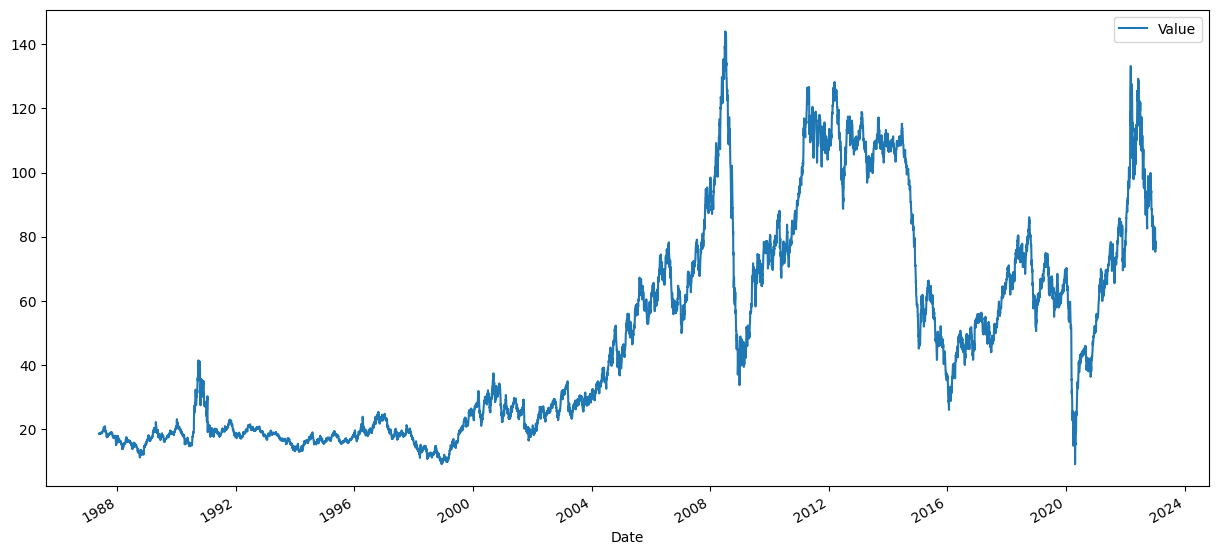

In [16]:
df.plot(figsize = (15,7))

## Getting values of crude price
- In these section we target the value index for getting the `Length` and `DataType`
- After that we using StandardScaler Libraries for setting the range
- Here I extracting the data values and and storing it into `DF1`.

In [17]:
#Getting values of crude Price
df1 = df.reset_index()['Value']

In [18]:
df1

0       18.63
1       18.45
2       18.55
3       18.60
4       18.63
        ...  
9056    75.31
9057    76.73
9058    76.41
9059    77.50
9060    78.40
Name: Value, Length: 9061, dtype: float64

- Here I scaling the data
- Here I scaling complete data not just seprating , training or testing the data
- I am using standard scaler at this point 

In [19]:
#Scaling the data and for scaling I using the standardScaler 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [20]:
df1.shape

(9061, 1)

In [21]:
df1

array([[-0.91134164],
       [-0.91681863],
       [-0.91377586],
       ...,
       [ 0.8467726 ],
       [ 0.87993882],
       [ 0.90732378]])

### Now you can see it has been scaled by using StandardScaler itself and normalize the data

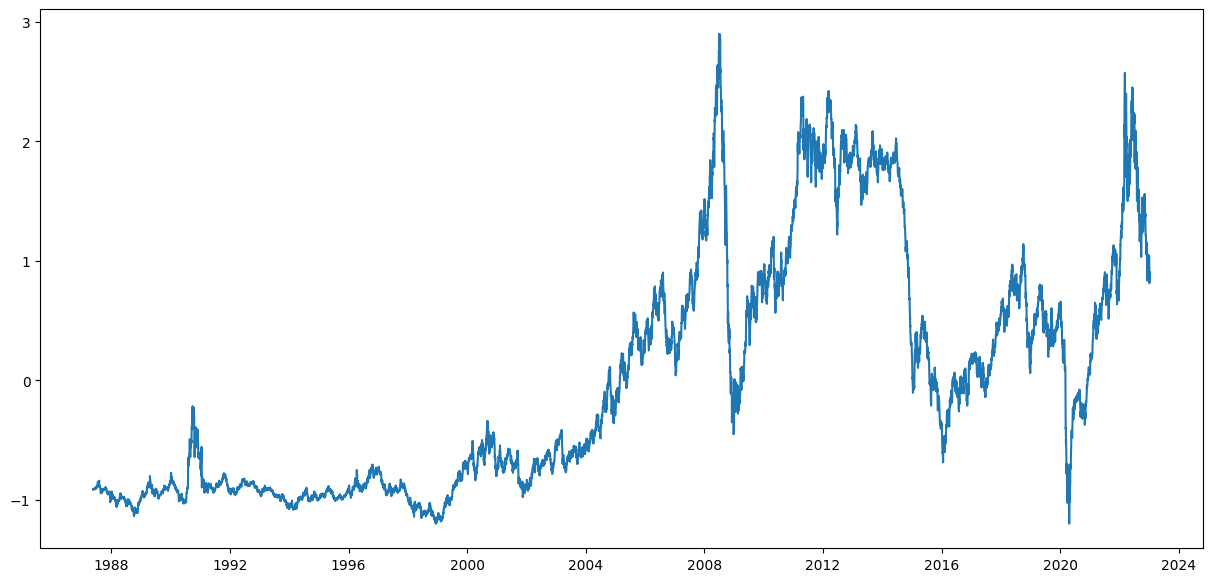

In [22]:
plt.figure(figsize=(15,7))
plt.plot(df.index,df1)

## Deciding the time window 
- For window I am getting 100 days.
- Here my assumption is that 100 past data affecting by 101 day 

In [23]:
w = int(input(' Enter Window Size: '))

 Enter Window Size: 100


### Here I spearting the training data and testing data 
- I am using around 96% of complete data as the training set and last 4% testing set

In [24]:
training_size = int(len(df1)*0.96)
test_size = len(df1) - training_size
train_data,test_data = df1[0:training_size+w,:],df1[training_size:len(df1),:]

In [25]:
train_data.shape, test_data.shape

((8798, 1), (363, 1))

### Now you can see my training data and testing data 

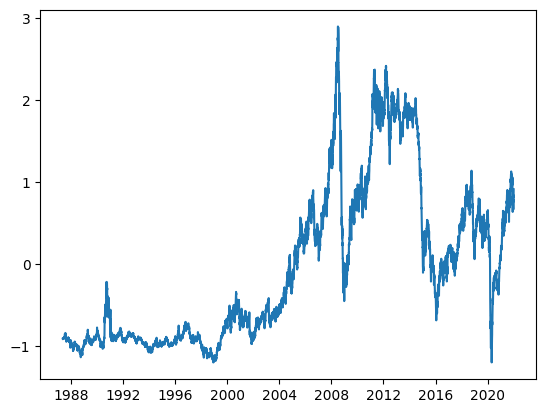

In [26]:
plt.plot(df.index[:training_size+100],train_data)

## Creating the data set 
- This function taking the data set as an input and it istaking time step as input BY Default I have set 100 sets.
- After that I am making two list 
        `List X` and `List Y`
        

In [27]:
def create_dataset(dataset,time_step = 1):
    dataX, dataY = [],[]
    
    for i in range(len(dataset)-time_step):
        a = dataset[i:(i+time_step),0] #i=0 then 0,1,2,3,4 will be x and y=4 
        
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
        
    return np.array(dataX),np.array(dataY)

- Now I am using the last function I am creating the data set like
`X_train`,`Y_train`,`X_test` and `Y_test`

In [28]:
time_step = w
#Using 100 consecutive values predecting 101th value
#f1--------f100 =X
#f101 = y
X_train, y_train = create_dataset(train_data,time_step)
X_test, y_test = create_dataset(test_data,time_step)

- Here I showing the data shape of my extend and X_train and X_test is `8698` to `100` 
- On this time of point that is presnt inside two dimensional array by using `.shape`

In [29]:
#Shape of X_train and X_test 
X_train.shape,X_test.shape
#Now it is 2D array

((8698, 100), (263, 100))

## Making the data 3D
  

In [30]:
#Making the data into 3D
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [31]:
X_train.shape,X_test.shape

((8698, 100, 1), (263, 100, 1))

## This is 3D arrays

In [32]:
X_train

array([[[-0.91134164],
        [-0.91681863],
        [-0.91377586],
        ...,
        [-0.90677748],
        [-0.91225447],
        [-0.91286303]],

       [[-0.91681863],
        [-0.91377586],
        [-0.91225447],
        ...,
        [-0.91225447],
        [-0.91286303],
        [-0.91134164]],

       [[-0.91377586],
        [-0.91225447],
        [-0.91134164],
        ...,
        [-0.91286303],
        [-0.91134164],
        [-0.91225447]],

       ...,

       [[ 0.71684619],
        [ 0.68276713],
        [ 0.64108114],
        ...,
        [ 0.73844988],
        [ 0.7944369 ],
        [ 0.84220844]],

       [[ 0.68276713],
        [ 0.64108114],
        [ 0.68641846],
        ...,
        [ 0.7944369 ],
        [ 0.84220844],
        [ 0.81117215]],

       [[ 0.64108114],
        [ 0.68641846],
        [ 0.71228203],
        ...,
        [ 0.84220844],
        [ 0.81117215],
        [ 0.81117215]]])

#### I made a small model here just used 50-50 neurons becouse I don't have GPU support and if I want to extend it taking lot of time.
- Here I just used `LSTM` and final there i'm adding a `dense layer` that will be giving my ouput or that is giving my forcasted value 
- Than I'm using the mean `squared error` and optimizar to using `adam`

In [35]:
model = Sequential() #Sequential model
model.add(LSTM(50,return_sequences = True, input_shape=(100,1))) #Input shape of batch
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

### On this point our model is looking like this and this having `50851` parameters 

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


### Now I am fitting my model on X train and Y train validation data will be accessed and white test and 10 new book so that it will take less number of times less.

In [96]:
model.fit(X_train,y_train,validation_data= (X_test,y_test),epochs= 1,batch_size =128, verbose =1)

68/68 [==============================] - 21s 299ms/step - loss: 0.0040 - val_loss: 0.0239


- Now I got a train predictor and trained test predict from  my model 

In [97]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

9/9 [==============================] - 1s 68ms/step


#### Now I have to invest transform that particular by using scalar that we have used for scaling data

In [98]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

#### Now in this step i'm just calculating the mean square root error that we obviously will come high value becouse we have went to 10 epoch and our `LSTM` model is also small

In [99]:
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

56.811042167659096

In [100]:
math.sqrt(mean_squared_error(y_test,test_predict))

99.87284477422597

In [101]:
train_predict.shape

(8698, 1)

In [102]:
test_predict.shape

(263, 1)

- Now just few step I'm making the data frame for my predicting values and my actual value and it's all are simle python code

In [103]:
a = train_predict.reshape(train_predict.shape[0],)

In [104]:
b = test_predict.reshape(test_predict.shape[0],)

In [105]:
#Here we do total
c = list(a)+list(b) 

In [106]:
len(c)

8961

In [107]:
df

,Value,Predicted Price
Date,,
1987-05-20,18.63,NaN
1987-05-21,18.45,NaN
1987-05-22,18.55,NaN
1987-05-25,18.60,NaN
1987-05-26,18.63,NaN
...,...,...
2023-01-04,75.31,81.562454
2023-01-05,76.73,80.926247
2023-01-06,76.41,79.896332


Exact difference of 100

In [108]:
t = []
for i in range(100):
    t.append(np.NaN)

In [109]:
d = t+c

In [110]:
len(d)

9061

In [111]:
df['Predicted Price'] =d

Below cell is showing the data frame and on the right first colomn is initial or actual values and on the right side it is the my predicteing values and will be showing `NaN` and why they showing `NaN` the reason is that, first 100 values we have taken for 101th values,So those hundred values is not predicted.
So the first 100 values remain `NaN`

In [112]:
df

,Value,Predicted Price
Date,,
1987-05-20,18.63,NaN
1987-05-21,18.45,NaN
1987-05-22,18.55,NaN
1987-05-25,18.60,NaN
1987-05-26,18.63,NaN
...,...,...
2023-01-04,75.31,82.637993
2023-01-05,76.73,81.815170
2023-01-06,76.41,80.593155


## Ploting my actual values and my predicted values for training set and testing set
- On this point we haven't done any forecasting 

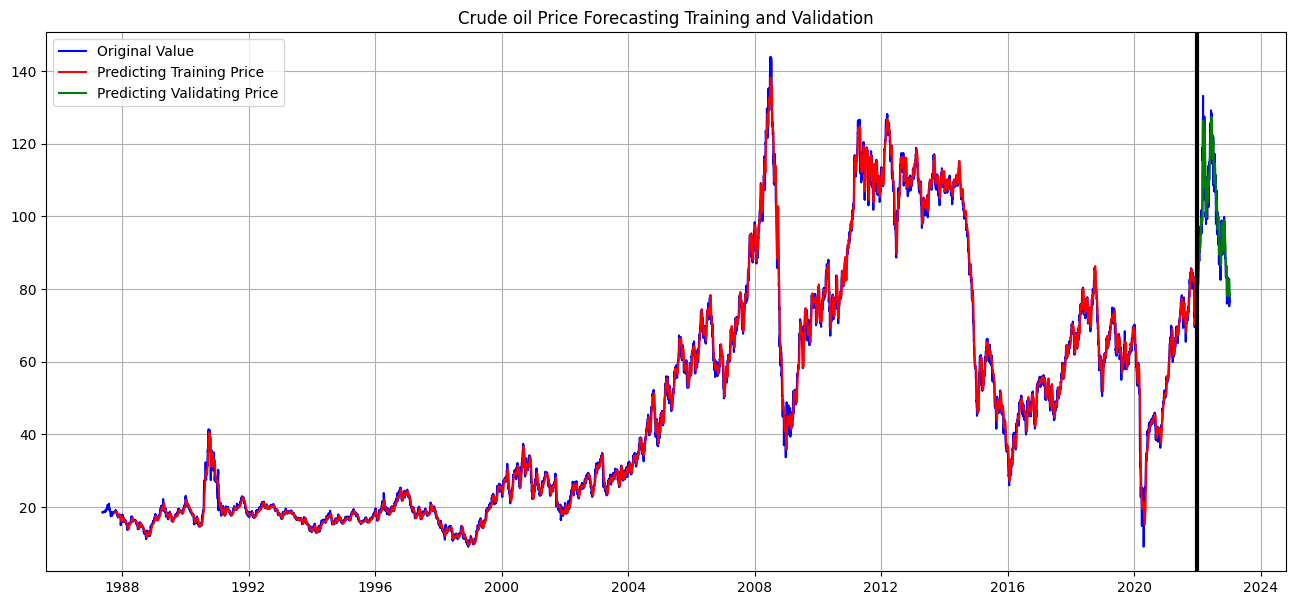

In [113]:
plt.figure(figsize = (16,7))
plt.grid(True)
plt.title('Crude oil Price Forecasting Training and Validation')
plt.plot(df.index,df['Value'],label = "Original Value", c = "blue")
plt.plot(df[:train_predict.shape[0]+w].index,df['Predicted Price'][:train_predict.shape[0]+w],label = "Predicting Training Price", c='red')
plt.plot(df.index[train_predict.shape[0]+100:],df['Predicted Price'][train_predict.shape[0]+w:],label = "Predicting Validating Price",c ='green')
plt.axvline(df.index[train_predict.shape[0]+w], color='black',lw=3)

plt.legend()

### Now I'm using this model for forecasting purpose because till this point I have data it  just looking good is predicting for the data that I have.

## Forecasting in Future
- We have data till date `2023-01-10 to 1987-05-20`
- Now I want the forcasted value after `2023-01-10`


In [60]:
df

,Value,Predicted Price
Date,,
1987-05-20,18.63,NaN
1987-05-21,18.45,NaN
1987-05-22,18.55,NaN
1987-05-25,18.60,NaN
1987-05-26,18.63,NaN
...,...,...
2023-01-04,75.31,81.562454
2023-01-05,76.73,80.926247
2023-01-06,76.41,79.896332


### First i'm making the data frame out of it first 100 values and reperseting that `CD`

In [63]:
cd = df[100:] #cd = Crude Oil

In [64]:
cd

,Value,Predicted Price
Date,,
1987-10-08,18.63,18.483572
1987-10-09,18.60,18.491814
1987-10-12,18.55,18.496473
1987-10-13,18.55,18.496679
1987-10-14,18.68,18.492405
...,...,...
2023-01-04,75.31,81.562454
2023-01-05,76.73,80.926247
2023-01-06,76.41,79.896332


## Test data shape

In [114]:
test_data.shape

(363, 1)

- On this step I am going to use last 100 point and will we predicting the output of `2023-01-201 

In [66]:
#For next one day price, Last 100 days data is needed
x_input = test_data[-100:].reshape(1,-1)
x_input.shape

(1, 100)

- Here I am able to calculate the crude price for `20th of Jan `

In [67]:
x_input

array([[1.45350153, 1.4565443 , 1.41424976, 1.5490446 , 1.56060714,
        1.52835375, 1.59894608, 1.54448044, 1.45958708, 1.32844356,
        1.35430713, 1.38869047, 1.3037971 , 1.16382954, 1.19912571,
        1.31140403, 1.36526111, 1.32235802, 1.34639592, 1.23837748,
        1.24294164, 1.24294164, 1.24872291, 1.25602556, 1.27245654,
        1.08654311, 1.03359886, 1.13766169, 1.24659297, 1.24233309,
        1.22681494, 1.2809763 , 1.37408516, 1.39264607, 1.43220212,
        1.53048369, 1.47723516, 1.41759681, 1.36495684, 1.41729253,
        1.32783501, 1.29193029, 1.24385447, 1.3010586 , 1.3065356 ,
        1.31566391, 1.30805698, 1.34943869, 1.38716908, 1.40147011,
        1.36069696, 1.41607542, 1.44498177, 1.42124814, 1.55026171,
        1.56060714, 1.4687154 , 1.35309002, 1.3896033 , 1.45411009,
        1.369521  , 1.39112469, 1.33970182, 1.29071318, 1.22772778,
        1.21281819, 1.21920801, 1.13553175, 1.12609916, 1.05946243,
        1.0625052 , 1.05398544, 1.12670771, 1.14

In [68]:
temp_input = list(x_input)

In [69]:
temp_input

[array([1.45350153, 1.4565443 , 1.41424976, 1.5490446 , 1.56060714,
        1.52835375, 1.59894608, 1.54448044, 1.45958708, 1.32844356,
        1.35430713, 1.38869047, 1.3037971 , 1.16382954, 1.19912571,
        1.31140403, 1.36526111, 1.32235802, 1.34639592, 1.23837748,
        1.24294164, 1.24294164, 1.24872291, 1.25602556, 1.27245654,
        1.08654311, 1.03359886, 1.13766169, 1.24659297, 1.24233309,
        1.22681494, 1.2809763 , 1.37408516, 1.39264607, 1.43220212,
        1.53048369, 1.47723516, 1.41759681, 1.36495684, 1.41729253,
        1.32783501, 1.29193029, 1.24385447, 1.3010586 , 1.3065356 ,
        1.31566391, 1.30805698, 1.34943869, 1.38716908, 1.40147011,
        1.36069696, 1.41607542, 1.44498177, 1.42124814, 1.55026171,
        1.56060714, 1.4687154 , 1.35309002, 1.3896033 , 1.45411009,
        1.369521  , 1.39112469, 1.33970182, 1.29071318, 1.22772778,
        1.21281819, 1.21920801, 1.13553175, 1.12609916, 1.05946243,
        1.0625052 , 1.05398544, 1.12670771, 1.14

In [70]:
temp_input = temp_input[0].tolist()

In [71]:
temp_input

[1.453501531482521,
 1.456544304480334,
 1.4142497598107389,
 1.5490446036138363,
 1.5606071410055244,
 1.528353747228711,
 1.5989460807779627,
 1.5444804441171178,
 1.4595870774781463,
 1.3284435612724237,
 1.3543071317538309,
 1.388690466629113,
 1.303797099990142,
 1.1638295420907627,
 1.1991257088653886,
 1.3114040324846736,
 1.3652611145459563,
 1.3223580152767989,
 1.346395921959518,
 1.2383774805371712,
 1.2429416400338904,
 1.2429416400338904,
 1.2487229087297342,
 1.2560255639244842,
 1.2724565381126725,
 1.0865431079463232,
 1.033598857784384,
 1.1376616943095745,
 1.246592967631265,
 1.2423330854343275,
 1.2268149431454836,
 1.2809763025065477,
 1.3740851562396126,
 1.3926460715262692,
 1.4322021204978332,
 1.5304836883271795,
 1.4772351608654593,
 1.4175968101083327,
 1.364956837246175,
 1.4172925328085513,
 1.3278350066728613,
 1.291930285298673,
 1.2438544719332336,
 1.3010586042921106,
 1.306535595688173,
 1.3156639146816107,
 1.3080569821870793,
 1.349438694957331,
 1.3

# Demonstrate predictions for next 30 Days:
- First time else loop willl run, reshape is done and after tht it passes to model and prediction is done for 101st day, after that this 101th day data is added in final output. And this 101 day data will be used in previous input list. Now the input list will have 101 elements so the if loop will run and the data for first day is fropped so that we can take data from day 2 to day 101 and predict data for day 102, in a similary way the loopa qill run for 30 days

- for i=0(first loop in while). the else loop will run because 100 elements are present in temp_input. After adding data for 101 day from forecasting. the if loop will run and 1st data will be excluded

In [76]:
lst_output = []
n_steps = 100
i=0
# Here Yhat is the cure price of 101th day or next day

while i<30: #For 30 days forecast
    if(len(temp_input)>100):
        #print(temp_input)
        x_input = np.array(temp_input[1:]) # Taking x_input values from 2nd value onward
        print('{} day input {}'.format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps,1)) #making tensor of 1 batch,with n rows and 1 column
        #print(x_input)
        yhat = model.predict(x_input,verbose=1)
        print('{} day output {}'.format(i,yhat))
        temp_input.extend(yhat[0].tolist()) # Adding forecasting value to the temp_input.
        temp_input = temp_input[1:] # Because after adding the above yhat[0],total number of elements
        #print(temp_input)
        lst_output.extend(yhat.tolist()) #Adding 101 day forcast to output forecasting list 
        i = i+1
    else: #first loop will go inside this
        x_input = x_input.reshape((1,n_steps,1)) #Last 100 days data 
        yhat= model.predict(x_input,verbose = 0) #Taking prediction from model
        print(yhat[0])
        temp_input.extend(yhat[0].tolist()) #Adding predicted value of 101 day in temp_input 
        print(len(temp_input))
        lst_output.extend(yhat.tolist()) #Adding 101 day forecast to output forecasting list
        i =i+1
print(lst_output)

0 day input [1.22681494 1.2809763  1.37408516 1.39264607 1.43220212 1.53048369
 1.47723516 1.41759681 1.36495684 1.41729253 1.32783501 1.29193029
 1.24385447 1.3010586  1.3065356  1.31566391 1.30805698 1.34943869
 1.38716908 1.40147011 1.36069696 1.41607542 1.44498177 1.42124814
 1.55026171 1.56060714 1.4687154  1.35309002 1.3896033  1.45411009
 1.369521   1.39112469 1.33970182 1.29071318 1.22772778 1.21281819
 1.21920801 1.13553175 1.12609916 1.05946243 1.0625052  1.05398544
 1.12670771 1.14709429 1.1550055  1.05824532 0.95357393 0.86807201
 0.83490578 0.84555549 0.89515269 1.05733249 1.02720903 0.96209369
 1.00651818 0.93927289 0.96361508 0.9432285  1.03055608 1.03055608
 1.00773529 0.98521877 1.04181434 1.04181434 0.96696213 0.81330209
 0.85650947 0.8467726  0.87993882 0.90732378 0.85434347 0.83424342
 0.81829005 0.80492669 0.79308236 0.78212416 0.77173001 0.76176274
 0.75217807 0.74296665 0.73412442 0.72564119 0.71749741 0.70966667
 0.70211965 0.69482529 0.68775445 0.68088084 0.674

1/1 [==============================] - 0s 39ms/step
6 day output [[0.5698128]]
7 day input [1.41759681 1.36495684 1.41729253 1.32783501 1.29193029 1.24385447
 1.3010586  1.3065356  1.31566391 1.30805698 1.34943869 1.38716908
 1.40147011 1.36069696 1.41607542 1.44498177 1.42124814 1.55026171
 1.56060714 1.4687154  1.35309002 1.3896033  1.45411009 1.369521
 1.39112469 1.33970182 1.29071318 1.22772778 1.21281819 1.21920801
 1.13553175 1.12609916 1.05946243 1.0625052  1.05398544 1.12670771
 1.14709429 1.1550055  1.05824532 0.95357393 0.86807201 0.83490578
 0.84555549 0.89515269 1.05733249 1.02720903 0.96209369 1.00651818
 0.93927289 0.96361508 0.9432285  1.03055608 1.03055608 1.00773529
 0.98521877 1.04181434 1.04181434 0.96696213 0.81330209 0.85650947
 0.8467726  0.87993882 0.90732378 0.85434347 0.83424342 0.81829005
 0.80492669 0.79308236 0.78212416 0.77173001 0.76176274 0.75217807
 0.74296665 0.73412442 0.72564119 0.71749741 0.70966667 0.70211965
 0.69482529 0.68775445 0.68088084 0.6741

1/1 [==============================] - 0s 47ms/step
13 day output [[0.5346527]]
14 day input [1.3065356  1.31566391 1.30805698 1.34943869 1.38716908 1.40147011
 1.36069696 1.41607542 1.44498177 1.42124814 1.55026171 1.56060714
 1.4687154  1.35309002 1.3896033  1.45411009 1.369521   1.39112469
 1.33970182 1.29071318 1.22772778 1.21281819 1.21920801 1.13553175
 1.12609916 1.05946243 1.0625052  1.05398544 1.12670771 1.14709429
 1.1550055  1.05824532 0.95357393 0.86807201 0.83490578 0.84555549
 0.89515269 1.05733249 1.02720903 0.96209369 1.00651818 0.93927289
 0.96361508 0.9432285  1.03055608 1.03055608 1.00773529 0.98521877
 1.04181434 1.04181434 0.96696213 0.81330209 0.85650947 0.8467726
 0.87993882 0.90732378 0.85434347 0.83424342 0.81829005 0.80492669
 0.79308236 0.78212416 0.77173001 0.76176274 0.75217807 0.74296665
 0.73412442 0.72564119 0.71749741 0.70966667 0.70211965 0.69482529
 0.68775445 0.68088084 0.67418003 0.66763198 0.66121829 0.65492409
 0.64873695 0.64264596 0.63664216 0.6

1/1 [==============================] - 0s 42ms/step
20 day output [[0.50219834]]
21 day input [1.41607542 1.44498177 1.42124814 1.55026171 1.56060714 1.4687154
 1.35309002 1.3896033  1.45411009 1.369521   1.39112469 1.33970182
 1.29071318 1.22772778 1.21281819 1.21920801 1.13553175 1.12609916
 1.05946243 1.0625052  1.05398544 1.12670771 1.14709429 1.1550055
 1.05824532 0.95357393 0.86807201 0.83490578 0.84555549 0.89515269
 1.05733249 1.02720903 0.96209369 1.00651818 0.93927289 0.96361508
 0.9432285  1.03055608 1.03055608 1.00773529 0.98521877 1.04181434
 1.04181434 0.96696213 0.81330209 0.85650947 0.8467726  0.87993882
 0.90732378 0.85434347 0.83424342 0.81829005 0.80492669 0.79308236
 0.78212416 0.77173001 0.76176274 0.75217807 0.74296665 0.73412442
 0.72564119 0.71749741 0.70966667 0.70211965 0.69482529 0.68775445
 0.68088084 0.67418003 0.66763198 0.66121829 0.65492409 0.64873695
 0.64264596 0.63664216 0.63071883 0.62486982 0.6190902  0.61337686
 0.6077264  0.60213679 0.59660673 0.5

1/1 [==============================] - 0s 43ms/step
27 day output [[0.47233668]]
28 day input [1.3896033  1.45411009 1.369521   1.39112469 1.33970182 1.29071318
 1.22772778 1.21281819 1.21920801 1.13553175 1.12609916 1.05946243
 1.0625052  1.05398544 1.12670771 1.14709429 1.1550055  1.05824532
 0.95357393 0.86807201 0.83490578 0.84555549 0.89515269 1.05733249
 1.02720903 0.96209369 1.00651818 0.93927289 0.96361508 0.9432285
 1.03055608 1.03055608 1.00773529 0.98521877 1.04181434 1.04181434
 0.96696213 0.81330209 0.85650947 0.8467726  0.87993882 0.90732378
 0.85434347 0.83424342 0.81829005 0.80492669 0.79308236 0.78212416
 0.77173001 0.76176274 0.75217807 0.74296665 0.73412442 0.72564119
 0.71749741 0.70966667 0.70211965 0.69482529 0.68775445 0.68088084
 0.67418003 0.66763198 0.66121829 0.65492409 0.64873695 0.64264596
 0.63664216 0.63071883 0.62486982 0.6190902  0.61337686 0.6077264
 0.60213679 0.59660673 0.59113443 0.58571923 0.58036101 0.57505882
 0.56981277 0.56462258 0.55948818 0.5

In [77]:
lst_output

[[0.6021367907524109],
 [0.5966067314147949],
 [0.5911344289779663],
 [0.5857192277908325],
 [0.580361008644104],
 [0.5750588178634644],
 [0.5698127746582031],
 [0.5646225810050964],
 [0.5594881772994995],
 [0.5544096827507019],
 [0.5493869781494141],
 [0.5444200038909912],
 [0.5395084619522095],
 [0.5346527099609375],
 [0.5298522114753723],
 [0.5251069068908691],
 [0.5204165577888489],
 [0.5157809853553772],
 [0.5111995935440063],
 [0.5066721439361572],
 [0.502198338508606],
 [0.49777746200561523],
 [0.4934091567993164],
 [0.4890928566455841],
 [0.48482826352119446],
 [0.4806143045425415],
 [0.4764506220817566],
 [0.47233667969703674],
 [0.46827173233032227],
 [0.464255154132843]]

In [78]:
forecast = scaler.inverse_transform(lst_output)

In [79]:
forecast.shape

(30, 1)

In [80]:
forecast = forecast.reshape(30,)

In [81]:
cd

,Value,Predicted Price
Date,,
1987-10-08,18.63,18.483572
1987-10-09,18.60,18.491814
1987-10-12,18.55,18.496473
1987-10-13,18.55,18.496679
1987-10-14,18.68,18.492405
...,...,...
2023-01-04,75.31,81.562454
2023-01-05,76.73,80.926247
2023-01-06,76.41,79.896332



Making the some synthetic data dates for next 30 days byusing `PD.data_range`


In [82]:
t_fut = pd.date_range('2023-01-10 00:00:00+00:00', periods=30)

In [83]:
t_fut

DatetimeIndex(['2023-01-10 00:00:00+00:00', '2023-01-11 00:00:00+00:00',
               '2023-01-12 00:00:00+00:00', '2023-01-13 00:00:00+00:00',
               '2023-01-14 00:00:00+00:00', '2023-01-15 00:00:00+00:00',
               '2023-01-16 00:00:00+00:00', '2023-01-17 00:00:00+00:00',
               '2023-01-18 00:00:00+00:00', '2023-01-19 00:00:00+00:00',
               '2023-01-20 00:00:00+00:00', '2023-01-21 00:00:00+00:00',
               '2023-01-22 00:00:00+00:00', '2023-01-23 00:00:00+00:00',
               '2023-01-24 00:00:00+00:00', '2023-01-25 00:00:00+00:00',
               '2023-01-26 00:00:00+00:00', '2023-01-27 00:00:00+00:00',
               '2023-01-28 00:00:00+00:00', '2023-01-29 00:00:00+00:00',
               '2023-01-30 00:00:00+00:00', '2023-01-31 00:00:00+00:00',
               '2023-02-01 00:00:00+00:00', '2023-02-02 00:00:00+00:00',
               '2023-02-03 00:00:00+00:00', '2023-02-04 00:00:00+00:00',
               '2023-02-05 00:00:00+00:00', '2023-0

### Making the data frame of this particular forecasted values in `CD4`

In [84]:
cd4 = pd.DataFrame({'Forecast Price':forecast},index = t_fut)

In [85]:
cd4

,Forecast Price
2023-01-10 00:00:00+00:00,68.370103
2023-01-11 00:00:00+00:00,68.188359
2023-01-12 00:00:00+00:00,68.008513
2023-01-13 00:00:00+00:00,67.830544
2023-01-14 00:00:00+00:00,67.654448
2023-01-15 00:00:00+00:00,67.480192
2023-01-16 00:00:00+00:00,67.307782
2023-01-17 00:00:00+00:00,67.137208
2023-01-18 00:00:00+00:00,66.968467
2023-01-19 00:00:00+00:00,66.801563


### Ploting all the the things together 
In this ploting I showing the data from Jan 2022 to current date+30 future prediction

### Green row showing the my testing data and black is showing my forecasted 30 days data and you can see it is geting some of the trends from previous values 

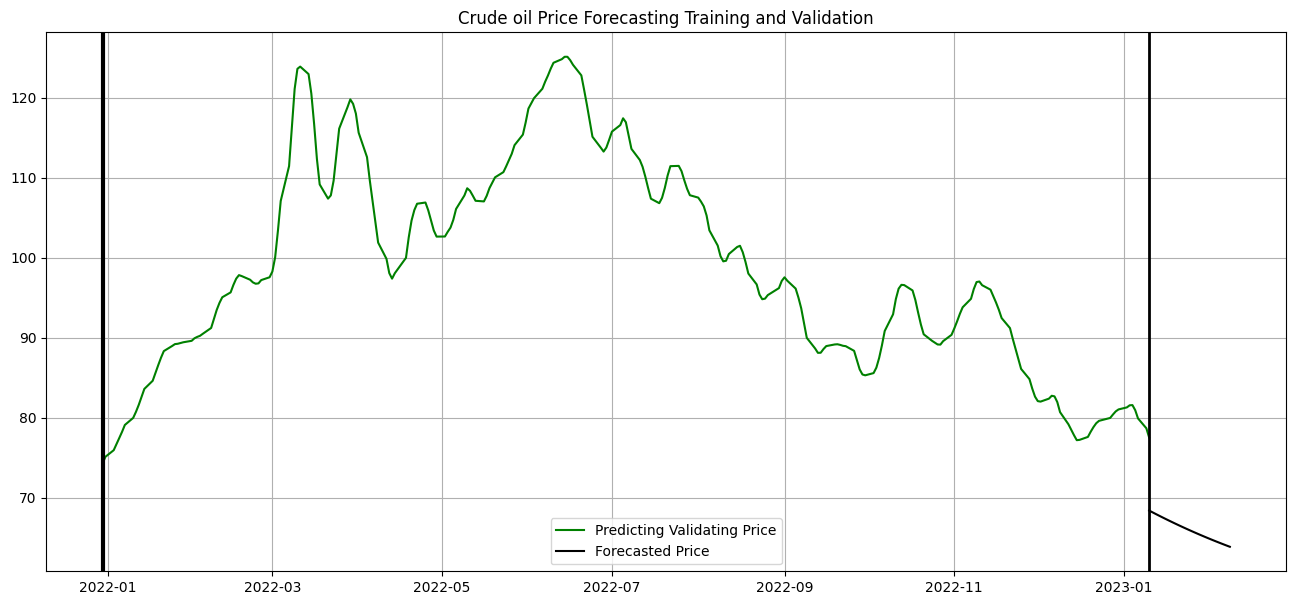

In [91]:
plt.figure(figsize = (16,7))
plt.grid(True)
plt.title('Crude oil Price Forecasting Training and Validation')
# plt.plot(df.index,df['Value'],label = "Original Value", c = 'blue')
# plt.plot(df[:train_predict.shape[0]+w].index,df['Predicted Price'][:train_predict.shape[0]+w],label = "Predicting Training Price", c='red')
plt.plot(df.index[train_predict.shape[0]+100:],df['Predicted Price'][train_predict.shape[0]+w:],label = "Predicting Validating Price",c ='green')

plt.plot(cd4.index,cd4['Forecast Price'],label = 'Forecasted Price',c ='black')

plt.axvline(df.index[train_predict.shape[0]+w], color='black',lw=3)
plt.axvline(cd4.index[0],color='black', lw=2)

plt.legend()

In this ploting I showing the data from 20 May 1987 to current date+30 for future prediction

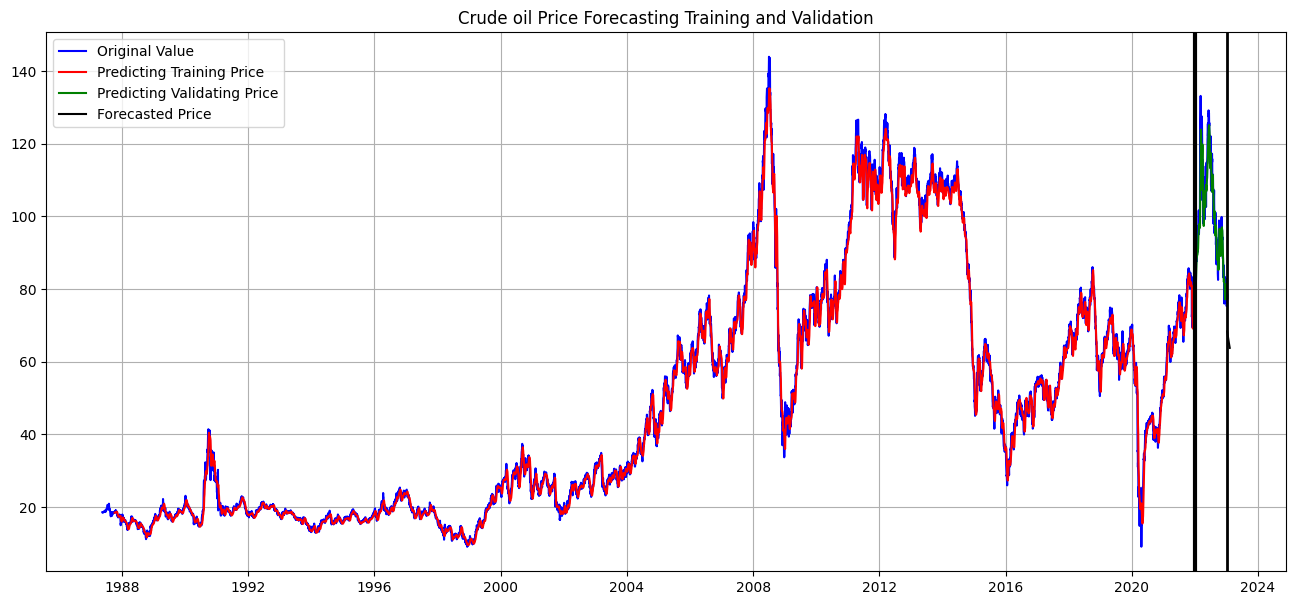

In [92]:
plt.figure(figsize = (16,7))
plt.grid(True)
plt.title('Crude oil Price Forecasting Training and Validation')
plt.plot(df.index,df['Value'],label = "Original Value", c = 'blue')
plt.plot(df[:train_predict.shape[0]+w].index,df['Predicted Price'][:train_predict.shape[0]+w],label = "Predicting Training Price", c='red')
plt.plot(df.index[train_predict.shape[0]+100:],df['Predicted Price'][train_predict.shape[0]+w:],label = "Predicting Validating Price",c ='green')

plt.plot(cd4.index,cd4['Forecast Price'],label = 'Forecasted Price',c ='black')

plt.axvline(df.index[train_predict.shape[0]+w], color='black',lw=3)
plt.axvline(cd4.index[0],color='black', lw=2)

plt.legend()

## Drabacks of LSTM univarite  forcating
- Crude oil price forecasting is not only depend on historical data it also fluctuates with the geopolitics and more factors like, `War`,`Natural Disasters`, and  `accidents` etc.
 
- In this model I haven't take care of those geopolitics things in these particular model.

- We haven't take care of geopolitics fluctuates because of that it's not proper correct
